<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sivert Escaff
- Nombre de alumno 2: Rodrigo Montecinos


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/...../)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> *Respuestas*

> 1.- Es una plataforma de procesamiento de datos que está optimizada para grandes volúmenes de información, por lo tanto, podemos manejar datasets más grandes que los que podemos trabajar en pandas a mayor velocidad y orden.\

>2.- RDD es la sigla de Resilient Distributed Dataset y es conocido por ser colecciones de elementos tolerantes a fallos y que es capaz de operar en paralelo, estos son optimizados para ser consultados mediante SQL.\

>3.- Las transformaciones son operaciones que crean un nuevo DataFrame a partir de uno existente. Estas operaciones tienen la caracteristica de no ejecutarse inmediatamente al definirse.Las acciones son operaciones que que son capaces de activar las ejecuciones de los planes construidos en etapas anteriores.

Ejemplos:

Transformacion: map  es una transformacion y un ejemplo es el siguiente:
rdd = sc.parallelize([1, 2, 3, 4])
rdd2 = rdd.map(lambda x: x * x)  # todo los elemetos se elevan al cuadrado

Accion: collect  es una accion y un ejemplo es el siguiente ( devuelve todo los datos de una rrd)
collected_data = rdd2.collect()  # Retorna [1, 4, 9, 16]

Internamente lo que sucede al aplicarse una accion es que spark convierte su plan de tranformaciones acumuladas en un dag y este se divide en diferntes tareas y etapas, luego se planifican y computan estas tareas , dependiendo de la cantidad de memoria y datos que se trabajan se pueden hacer diferentes pasos intermedios.Finalmente se reagrupan estos procesos que fueron separados en nodos y se almacenan en el sistemema de archivos , dependiendo la accion



>4.- Divide los datos en fragmentos para que se procesen de forma paralela y así busca mejorar el rendimiento, por lo tanto si el particionamiento es erróneo afecta en los tiempos de ejecución, provocando un retraso en el proceso.\

>5.- Con Spark Driver se puede coordinar las tareas distribuidas y además ejecutar el plan de trabajo, mientras que con Spark Executors se ejecutan las tareas y se almacenan los resultados en el caché.\

>6.- Catalyst Optimizer optimiza las consultas de SQL utilizando el análisis lógico y físico, para así poder mejorar la efiencia de cada query.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [5]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = r"Users\Program Files\Java\jdk-22"

El sistema no puede encontrar la ruta especificada.


In [6]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [8]:
import pyspark
print(pyspark.__version__)

3.5.2


In [7]:
import os

java_home = os.environ.get("JAVA_HOME")
print(f"JAVA_HOME: {java_home}")


JAVA_HOME: Users\Program Files\Java\jdk-22


In [9]:
import os
from pyspark.sql import SparkSession

# Configurar manualmente la ruta de Java
os.environ["JAVA_HOME"] = r"C:\Program Files\Java\jdk-22"  # Asegúrate de usar la ruta correcta donde está instalado JDK

# Crear la sesión de Spark
spark = SparkSession.builder \
    .appName("Parquet File Loading Example") \
    .getOrCreate()

# Imprimir la versión de Spark
print(spark.version)


3.5.2


In [10]:
from pyspark.sql import SparkSession

# Verificar si Spark está correctamente configurado
spark = SparkSession.builder \
    .appName("Parquet File Loading Example") \
    .getOrCreate()

print(spark.version)  # Esto debería devolver la versión de Spark

3.5.2


In [11]:
# Iniciar Spark Session
spark = SparkSession.builder \
    .appName("Parquet File Loading Example") \
    .getOrCreate()

# Cargar archivo Parquet 
df_parquet = spark.read.parquet(r"C:\datos_lab_spark.parquet")

# Mostrar el contenido del DataFrame de Spark
df_parquet.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [46]:
# Escriba su respuesta aquí

#1
df_parquet.printSchema()

#2
df_parquet.show(10)


#3
sampled_data = df_parquet.sample(False, 0.05)
sampled_data.show()

#4
df_parquet.dtypes

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)
 |-- Transaction bp: double (nullable = true)
 |-- Transaction Month: integer (nullable = true)
 |-- Type of purchase: string (nullable = false)

+--------------------+--------------------+------------------+-------------------+--------------+------------

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double'),
 ('Transaction bp', 'double'),
 ('Transaction Month', 'int'),
 ('Type of purchase', 'string')]

Podemos observar que la variable ('Is An Alien', 'double') y esto no tiene mucho sentido ya que deberia ser un valor booleano, que sea double puede ser confuso.
Por otro lado, 'Transaction Hour' corresponde a la hora de la transacion pero esta descrita por un double (un numero real), esto puede ser muy confuso y deberia usarse un int para referirse a una hora especifica del dia.
Un detalle es que la variable Quantity estaria mejor descrita por Int que double.

In [47]:
#5
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, col(col_name).cast(new_type))
    return df

# Creamos un diccionario que contenga las columnas a cambiar y sus cambios como values 
cols_to_cast = {
    'Is An Alien': 'boolean',
    'Transaction Hour': 'int',
    'Quantity': 'int'
}

# Aplicamos la función para cambiar los tipos de las columnas
df_parquet = cast_columns(df_parquet, cols_to_cast)
#mostrmaos los tipos de las columnas
df_parquet.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'int'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'boolean'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'int'),
 ('Transaction bp', 'double'),
 ('Transaction Month', 'int'),
 ('Type of purchase', 'string')]

In [54]:
# 6
from pyspark.sql.functions import col, sum

columns = df_parquet.columns

null_counts = df_parquet.select([
    sum(col(c).isNull().cast("int")).alias(c)
    for c in columns
])

null_counts.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|             0|          0|                 0|               0|             0|               0|       0|           0|               

In [48]:
#7
df_parquet = df_parquet.na.drop()
df_parquet.show()

#8
df_parquet = df_parquet.dropDuplicates()
df_parquet.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+--------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|   Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+--------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|bacd9392-73ce-4

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [13]:
from pyspark.sql.functions import col, log, abs, pow, month, when, avg

# Transaction bp
df_parquet = df_parquet.withColumn("Transaction bp", log(48 + abs(pow(col("Transaction Amount"), 36))))
# Transaction Month
df_parquet = df_parquet.withColumn("Transaction Month", month(col("Transaction Date")))
# Type of purchase
df_parquet = df_parquet.withColumn("Type of purchase", when(col("Quantity") <= 4, "Compra minorista")
                                           .otherwise("Compra mayorista"))
# Compras hechas por alienígenas en el comecio mayorista
alien_major_purchase = df_parquet.filter((col("Is An Alien") == 1) & (col("Quantity") >= 5))
# Cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas
count = df_parquet.groupBy("Is An Alien").count().show()
# Tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas
df_parquet.groupBy("Payment Method").pivot("Is An Alien").agg(avg("Transaction Amount")).show()

+-----------+------+
|Is An Alien| count|
+-----------+------+
|        0.0|449476|
|       NULL|126828|
|        1.0| 23696|
+-----------+------+

+--------------+------------------+------------------+-----------------+
|Payment Method|              null|               0.0|              1.0|
+--------------+------------------+------------------+-----------------+
|          NULL|227.70560127183097| 209.5592104526371|533.1688989441924|
|    debit card|227.63666117106283|209.06353818735838| 542.303301656258|
| bank transfer| 225.2408096257787|210.34851407059483|553.0852966558796|
|        PayPal|226.21069319051335|210.64447168409487|542.9382335081423|
|   credit card|226.76572332776416| 210.4529370999092| 546.813544887443|
+--------------+------------------+------------------+-----------------+



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [12]:
import seaborn as sns

In [14]:
# 1
df_pandas = df_parquet.toPandas()

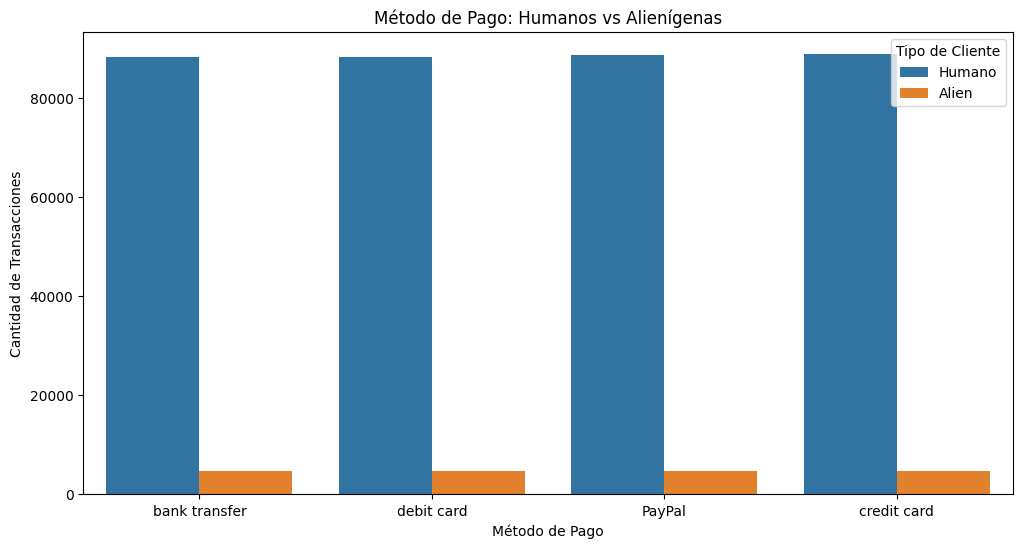

Is An Alien  Payment Method
0.0          PayPal            88729
             bank transfer     88371
             credit card       88884
             debit card        88400
1.0          PayPal             4636
             bank transfer      4719
             credit card        4679
             debit card         4642
dtype: int64


In [31]:
# 2.1
plt.figure(figsize=(12,6))
sns.countplot(data=df_pandas, x='Payment Method', hue='Is An Alien')
plt.title("Método de Pago: Humanos vs Alienígenas")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

# Verificación de los datos
print(df_pandas.groupby(['Is An Alien', 'Payment Method']).size())

El gráfico muestra que no hay una diferencia significativa en las proporciones de métodos de pago entre humanos y alienígenas. Esto resulta extraño, considerando la realidad en nuestro país, donde los métodos de pago más comunes son la tarjeta de débito y la tarjeta de crédito. En el contexto del estudio estadístico que se pueden realizar con este dataset, este gráfico muestra que no es una buena variable a utilizar.

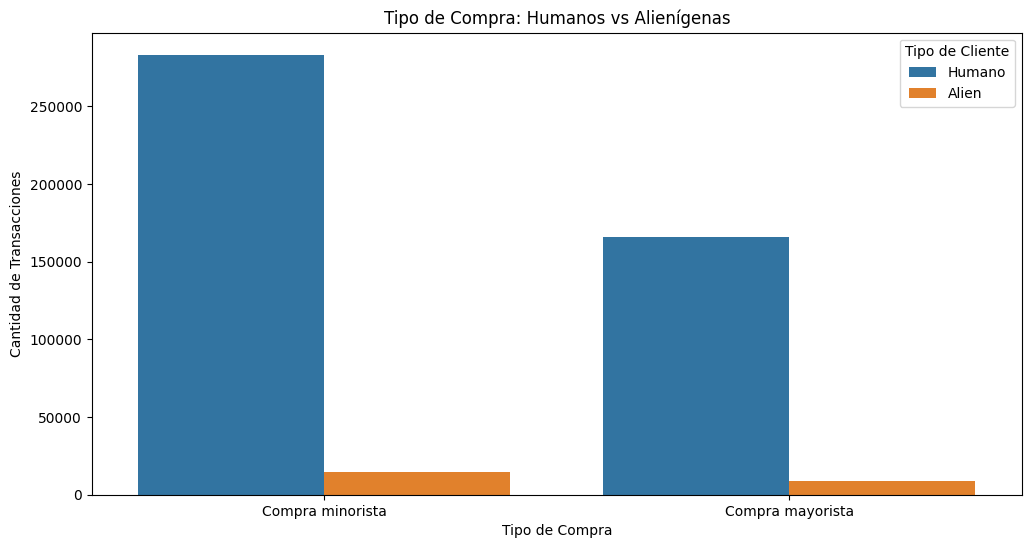

In [33]:
# 2.2
plt.figure(figsize=(12,6))
sns.countplot(data=df_pandas, x='Type of purchase', hue='Is An Alien')
plt.title("Tipo de Compra: Humanos vs Alienígenas")
plt.xlabel("Tipo de Compra")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

El grafico muestra una diferencia significativa entre la compra minorista y compra mayorista, teniendo una gran preferencia la minorista. Esta proporción se ve más clara en los humanos, mientras que los aliens siguen sin mantener una tendencia clara al momento decidir el tipo de compra.

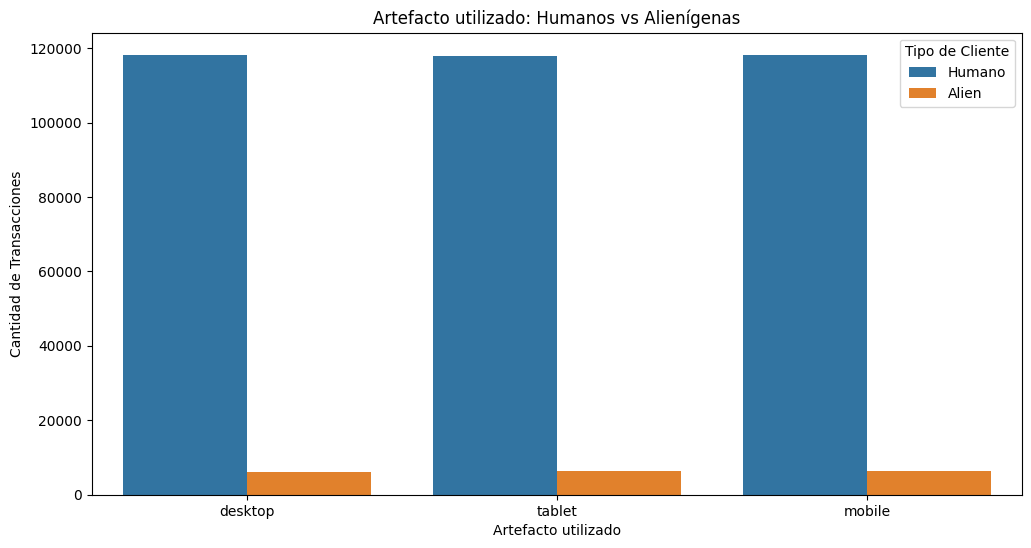

Is An Alien  Device Used
0.0          desktop        118063
             mobile         118248
             tablet         117874
1.0          desktop          6194
             mobile           6244
             tablet           6273
dtype: int64


In [34]:
# 2.3
plt.figure(figsize=(12,6))
sns.countplot(data=df_pandas, x='Device Used', hue='Is An Alien')
plt.title("Artefacto utilizado: Humanos vs Alienígenas")
plt.xlabel("Artefacto utilizado")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

# Verificación de los datos
print(df_pandas.groupby(['Is An Alien', 'Device Used']).size())

Es muy sorprendente las proporciones encontradas en el gráfico anterior, en donde parece que las proporciones entre cada artefacto que se utiliza para realizar la compra son idénticos. En el contexto del estudio estadístico que se pueden realizar con este dataset, este gráfico muestra que no es una buena variable a utilizar.

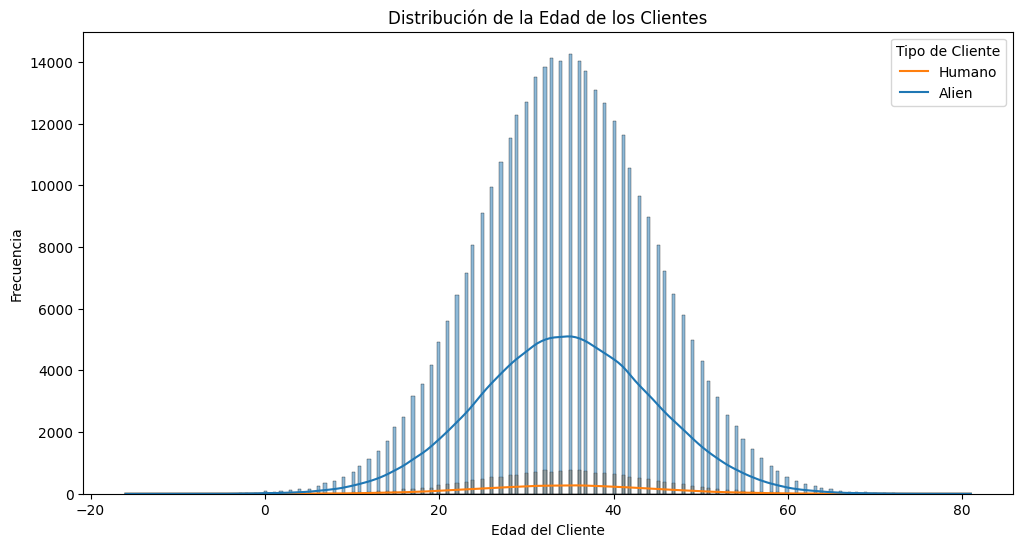

In [35]:
# 3.1
plt.figure(figsize=(12,6))
sns.histplot(data=df_pandas, x='Customer Age', hue='Is An Alien', kde=True)
plt.title("Distribución de la Edad de los Clientes")
plt.xlabel("Edad del Cliente")
plt.ylabel("Frecuencia")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

Este gráfico revela una distribución cercana a lo esperado, con una tendencia gaussiana en las edades tanto de humanos como de alienígenas. Lo interesante de este hallazgo es que permite identificar las edades de los usuarios que más frecuentan la tienda e-commerce del compadre Bodoque. Esto sugiere la posibilidad de desarrollar estrategias comerciales específicas, enfocadas en los intereses y preferencias comunes de los usuarios en el rango de edad de 30 a 40 años.

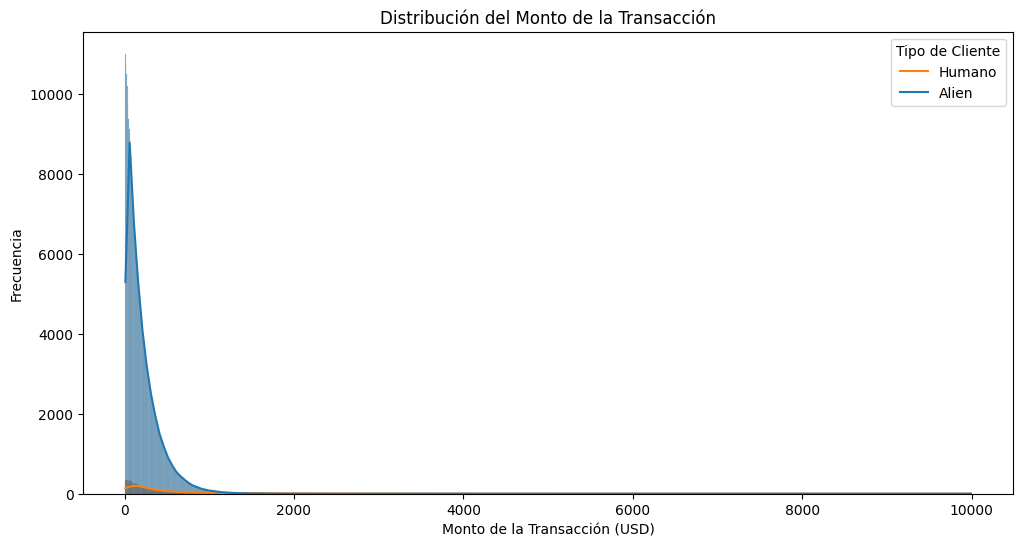

In [36]:
# 3.2
plt.figure(figsize=(12,6))
sns.histplot(data=df_pandas, x='Transaction Amount', hue='Is An Alien', kde=True)
plt.title("Distribución del Monto de la Transacción")
plt.xlabel("Monto de la Transacción (USD)")
plt.ylabel("Frecuencia")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

El análisis de los montos de las transacciones muestra una distribución cercana a la exponencial entre los humanos y una leve tendencia gaussiana entre los alienígenas. Este patrón es valioso para la tienda de Bodoque, ya que las medidas de tendencia central pueden ofrecer insights útiles para optimizar la distribución de productos y ajustar los precios de manera estratégica.

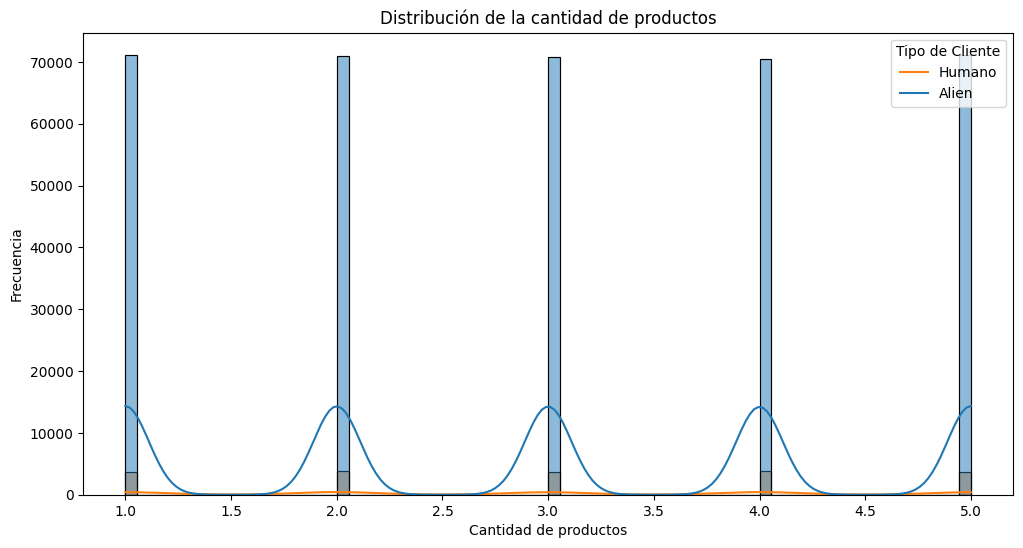

In [37]:
# 3.3
plt.figure(figsize=(12,6))
sns.histplot(data=df_pandas, x='Quantity', hue='Is An Alien', kde=True)
plt.title("Distribución de la cantidad de productos")
plt.xlabel("Cantidad de productos")
plt.ylabel("Frecuencia")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

Este gráfico nos dice simplemente, que no es útil para una utilizarse dentro de un estudio estadístico.

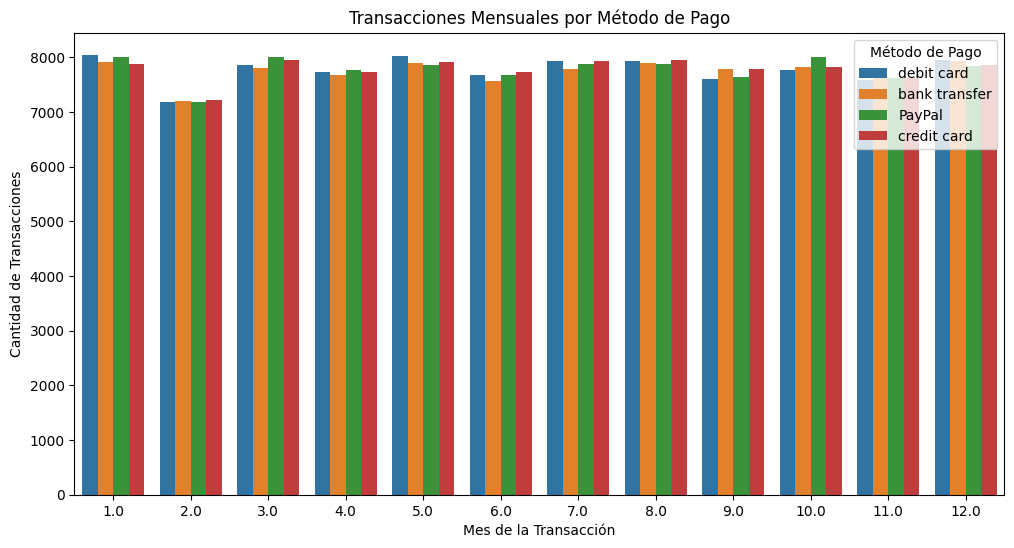

In [38]:
# 4.1
plt.figure(figsize=(12,6))
sns.countplot(data=df_pandas, x='Transaction Month', hue='Payment Method')
plt.title("Transacciones Mensuales por Método de Pago")
plt.xlabel("Mes de la Transacción")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Método de Pago")
plt.show()

Este gráfico es una variación del mostrado al inicio con el método de pago y la comparación entre humanos y alienígenas, este muestra la cantidad de transacciones por mes y su tipo de pago. Aquí se muestran pequeñas diferencias que pueden utilizarse para obtener alguna estrategía distinta en la tienda por cada mes.

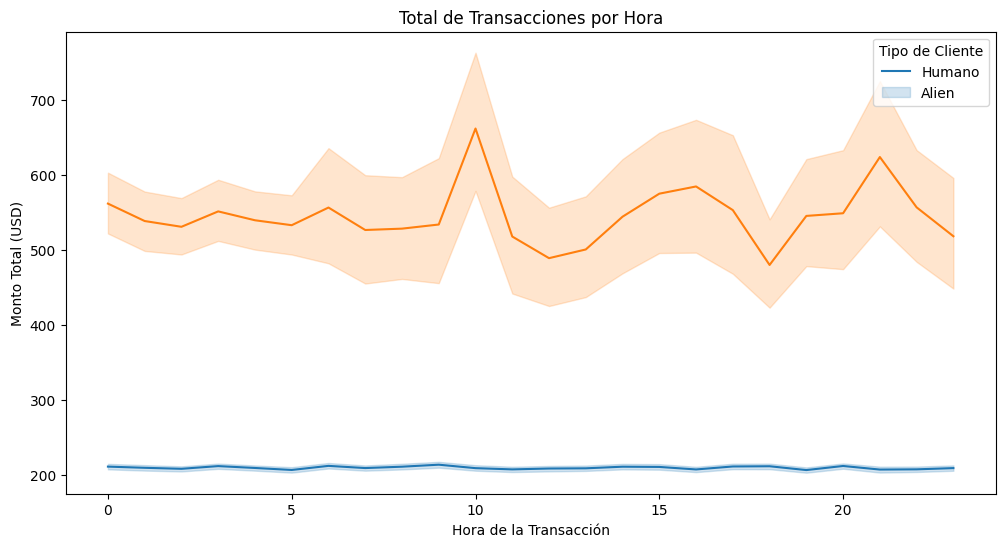

In [39]:
# 4.2
plt.figure(figsize=(12,6))
sns.lineplot(data=df_pandas, x='Transaction Hour', y='Transaction Amount', hue='Is An Alien')
plt.title("Total de Transacciones por Hora")
plt.xlabel("Hora de la Transacción")
plt.ylabel("Monto Total (USD)")
plt.legend(title="Tipo de Cliente", labels=['Humano', 'Alien'])
plt.show()

El gráfico revela que los alienígenas tienen un patrón horario uniforme para sus transacciones, a diferencia de los humanos, quienes muestran picos significativos en horas específicas, como a las 10:00 a.m. y las 9:00 p.m. Este hallazgo sugiere la oportunidad de implementar notificaciones push en la app de Bodoque durante estos horarios de mayor actividad para los humanos, mejorando su impacto.

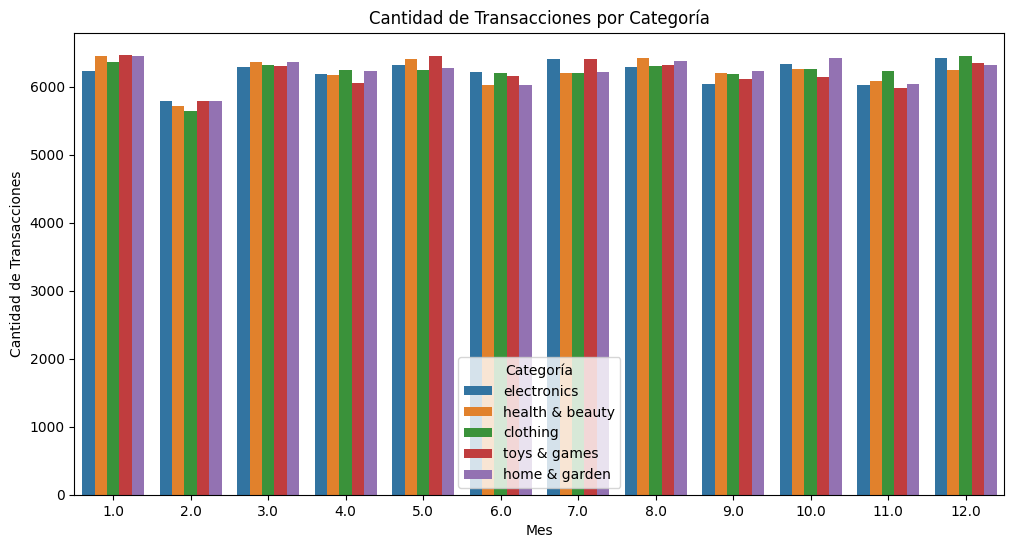

In [50]:
# 4.3
plt.figure(figsize=(12,6))
sns.countplot(data=df_pandas, x='Transaction Month', hue='Product Category')
plt.title("Cantidad de Transacciones por Categoría")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Transacciones")
plt.legend(title="Categoría")
plt.show()

En el gráfico, se separan la cantidad de transacciones mensuales y las distintas categorías de los productos, esto permite sacar tendencias mensuales de cada categoría y así poder crear estrategias comerciales de estos mismos. Se notan comportamientos distintos en cada mes de las categorías.

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.

In [24]:
# 1
df_parquet.createOrReplaceTempView("bodoque_table")

In [26]:
# 2
top_customers = spark.sql("""
                        SELECT 
                            `Customer ID`,
                            SUM(`Quantity`) as Cantidad_productos
                        FROM 
                            bodoque_table
                        GROUP BY 
                            `Customer ID`
                        ORDER BY
                             Cantidad_productos DESC
                        LIMIT 10
                        """)
top_customers.show()

+--------------------+------------------+
|         Customer ID|Cantidad_productos|
+--------------------+------------------+
|                NULL|          300490.0|
|b19d8759-357b-4e4...|               5.0|
|91db757f-4895-4db...|               5.0|
|43f49cfb-3539-4c9...|               5.0|
|11d8fe5b-fc2e-4e6...|               5.0|
|92b1344a-2ae7-4d1...|               5.0|
|0eb4455e-78a0-450...|               5.0|
|559b22f9-f6c5-48f...|               5.0|
|b3a8ba20-1116-480...|               5.0|
|1307a515-12d3-400...|               5.0|
+--------------------+------------------+



In [ ]:
# 3

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [49]:
1# Cargamos el archivo
path = 'C:\\object.pkl'

# Cargamos el archivo (se ejecuta pero creo que hay que usar un import bc pickle esta en amarillo)
import pickle
with open(path, 'rb') as file:
    serialized_object = pickle.load(file)

# mostramos el tipo de serialized_object para observar que es:
print(type(serialized_object))


<class 'sklearn.linear_model._logistic.LogisticRegression'>


c:\Users\rodri\anaconda3\envs\data\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
#2 Usamos dir() para ver los metodos y atributos
print(dir(serialized_object))

# Usamos help para evidenciar toda la informacion referente 
print(help(serialized_object.predict_proba))

In [ ]:
# 3
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType
import numpy as np


def predict_fraud_probability(transaction_amount, quantity, customer_age, transaction_hour):
    """
    Calcula la probabilidad de fraude basada en el modelo de regresion logistica que se encontraba en al serie.
    
    Parametros:
    - transaction_amount (float): Monto de la transaccion.
    - quantity (float): Cantidad de productos en la trasnsaccion.
    - customer_age (float): Edad del cliente.
    - transaction_hour (float): Hora del dia en que ocurrio la transaccion.
    
    Retorna:
    - float: Probabilidad de que la transaccion sea fraudulenta.
    """    
    features = np.array([[float(transaction_amount), float(quantity), float(customer_age), float(transaction_hour)]])
    probability = serialized_object.predict_proba(features)[0][1]  
    return float(probability)


ex=predict_fraud_probability
print(type(ex))

# 4
# Reistramos udf en spark
fraud_prob_udf = udf(predict_fraud_probability, FloatType())
print(type(fraud_prob_udf))

# 5
# Incorporamos la columna de las probabilidaes
df_with_fraud_prob = df_parquet.withColumn("fraud_probability", fraud_prob_udf("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour"))
print(type(df_with_fraud_prob))

Lo mas genial de spark y los udp es que se le puede entregar al afuncion el nombre de las columnas y no los valores de cada fila asociado a las columnas donde se quiere usar, esto permite procesar de manera distribuida optimizando recursos, ademas la implementacion es mucho mas universal y versatil que los procedimientos con pandas o python nativo.